In [1]:
import argparse
import os.path
import time
import math
import numpy as np
import pylab
import scipy.stats
import matplotlib
matplotlib.rc('mathtext', fontset='stixsans', default='regular')
import re
import rmgpy
from rmgpy.quantity import constants
from rmgpy.kinetics import Arrhenius, ArrheniusEP, KineticsData
from rmgpy.data.base import getAllCombinations
from rmgpy.data.kinetics.transitionstates import *
from rmgpy.species import Species
from rmgpy.data.rmg import RMGDatabase
import logging
from collections import defaultdict, OrderedDict
import pandas as pd
import itertools
import IPython
from IPython.display import display, Markdown
def mprint(s): display(Markdown(s))
import cPickle as pickle
# attempt at making the cells wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

ImportError: cannot import name generate_aromatic_resonance_structures

# TODO Update Dictionary

In [ ]:
r = OrderedDict()
r['index'] = np.nan
r['label'] = np.nan
r['']

In [ ]:
path = os.path.join(os.path.expandvars('$RMGpy'), "..",  'AutoTST', 'database')
path = os.path.join(path, 'H_Abstraction', 'TS_training', 'reactions.py')
f = open(path, 'r')

results = defaultdict(OrderedDict)

for i, entry in enumerate(f.read().split(')\n\nentry(')):
    r = OrderedDict()
    search_dict = {}
    search_terms = [
        'index = (.*),',
        'label = (.*),',
        'degeneracy = (.*),',
        'distances = (.*),',
        'method = (.*),',
        'rank = (.*),',
        'shortDesc = u"""(.*)""",'
    ]
    
    for search_term in search_terms:
            found = re.search(search_term, entry)
            if found is None:
                x = 1
                assert False
                #search_dict[search_term] = np.nan
            else:
                search_dict[search_term] = found.group(1)
    
    r = {
        'index': int(search_dict['index = (.*),']),
        'label': eval(search_dict['label = (.*),']),
        'degeneracy': int(search_dict['degeneracy = (.*),']),
        #'distances': eval(search_dict['distances = (.*),']),
        'method': eval(search_dict['method = (.*),']),
        #'rank': int(search_dict['rank = (.*),']),
        'shortDesc': search_dict['shortDesc = u"""(.*)""",'],
    }
    
    
    distances = eval(search_dict['distances = (.*),'])    
    for key in distances:
        r[key] = distances[key]
        
    assert r['d12'] > 0
    assert r['d13'] > 0
    assert r['d23'] > 0
    
    if 'rank = (.*),' in search_dict.keys():
        r['rank'] = int(search_dict['rank = (.*),'])
    else:
        r['rank'] = np.nan
        
        
    
    r['older reaction data'] = 1
    
    for key in r:
        if r[key] is None:
            r[key] = np.nan
    
    results[i] = r
    
og_df = pd.DataFrame(results)

f.close()

In [76]:
og_df.T.dropna(subset = ['label']).T
og_df.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,...,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489
d12,1.29429,1.16089,1.16829,1.11714,1.02548,0.863963,1.20143,1.10118,1.24081,1.23949,...,1.16822,1.19422,1.16659,1.24266,1.2313,1.2116,1.01625,0.87408,1.01165,1.2583
d13,2.25818,2.53998,2.52734,2.58514,2.71755,2.30267,2.48234,2.51218,2.69952,2.6721,...,2.51552,2.51563,2.5147,2.52874,2.53297,2.50945,2.28439,2.10317,2.29101,2.55116
d23,0.964372,1.39444,1.38856,1.4872,1.70887,1.43871,1.29764,1.41939,1.46367,1.43987,...,1.35029,1.32652,1.35075,1.29356,1.31056,1.31691,1.26914,1.23814,1.28216,1.29616
degeneracy,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
index,1,2,3,4,5,6,7,8,9,10,...,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490
label,H + C3H4 <=> H2 + C3H3,C3H3-1 + HO <=> H2O + C3H2,HO + C3H4 <=> H2O + C3H3,HO2 + C3H3 <=> C3H4 + O2,C6H5 + HO2 <=> C6H6 + O2,C6H5 + H2 <=> C6H6 + H,C6H6 + HO <=> H2O + C6H5,C6H5 + H2O2 <=> C6H6 + HO2-1,C6H5 + C3H4-1 <=> C6H6 + C3H3-2,C6H5 + C3H4 <=> C6H6 + C3H3,...,C4H10O2-2 + C4H9 <=> C4H10 + C4H9O2-2,C4H10O2-2 + C4H9-1 <=> C4H9O2-2 + C4H10-1,C4H10O2-1 + C4H9 <=> C4H10 + C4H9O2-1,C4H10O2-1 + C4H7 <=> C4H9O2-1 + C4H8,C4H10O2-1 + C4H7-3 <=> C4H9O2-1 + C4H8-3,H2O2 + C4H7O-8 <=> C4H8O-8 + HO2-1,H2 + C3H5 <=> C3H6 + H,H2 + C2H5O-2 <=> C2H6O-2 + H,H2 + C2H5O <=> C2H6O + H,C4H10O2-1 + C3H3O-1 <=> C4H9O2-1 + C3H4O-1
method,"m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)",...,"m062x/6-311+g(2df,2p)","m062x/6-311+g(2df,2p)","m062x/6-311+g(2df,2p)","m062x/6-311+g(2df,2p)","m062x/6-311+g(2df,2p)","m062x/6-311+g(2df,2p)","m062x/6-311+g(2df,2p)","m062x/6-311+g(2df,2p)","m062x/6-311+g(2df,2p)","m062x/6-311+g(2df,2p)"
older reaction data,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
rank,3,3,3,3,3,3,3,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shortDesc,"M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...",...,Reverse reaction for reaction index 1236,Reverse reaction for reaction index 1237,Reverse reaction for reaction index 1238,Reverse reaction for reaction index 1239,Reverse reaction for reaction index 1240,Reverse reaction for reaction index 1241,Reverse reaction for reaction index 1242,Reverse reaction for reaction index 1243,Reverse reaction for reaction index 1244,Reverse reaction for reaction index 1245


In [77]:
path = os.path.join(os.path.expandvars('$RMGpy'), "..",  'AutoTST')
path = os.path.join(path, 'distance_data.csv')
add_df = pd.DataFrame.from_csv(path)

results = defaultdict(OrderedDict)

for i, entry in enumerate(add_df.index):
    r = OrderedDict()
    
    label = add_df.T[entry].name
    label = label.replace('+', ' + ')
    label = label.replace('_', ' <=> ')
    
    r['label'] = label
    r['d12'] = add_df.T[entry]['d12']
    r['d13'] = add_df.T[entry]['d13']
    r['d23'] = add_df.T[entry]['d23']
    assert r['d12'] > 0
    assert r['d13'] > 0
    assert r['d23'] > 0
    
    r['method'] = 'm062x/6-311+G(2df,2p)'
    r['older reaction data'] = np.nan
    r['index'] = np.nan
    r['degeneracy'] = 1
    r['rank'] = np.nan
    r['shortDesc'] = 'M06-2X/6-311+G(2df,2p) calculation via group additive TS generator.'
    
    results[i] = r

new_df = pd.DataFrame(results)
new_df

,0,1,2,3,4,5,6,7,8,9,...,910,911,912,913,914,915,916,917,918,919
d12,1.19371,1.33,1.33386,1.27009,1.23684,1.35895,1.28077,1.19545,1.31902,1.3172,...,1.31683,1.30249,1.19877,1.18207,1.19192,1.26929,1.07281,1.20109,1.18011,1.35337
d13,2.51181,2.51181,2.48756,2.50212,2.48729,2.67482,2.53702,2.50671,2.53425,2.50333,...,2.51372,2.50298,2.51282,2.4742,2.49892,2.59361,2.3229,2.30434,2.51437,2.47972
d23,1.32998,1.1937,1.17008,1.23225,1.2574,1.32002,1.26687,1.3239,1.25043,1.19928,...,1.20214,1.21045,1.31509,1.32978,1.31891,1.35213,1.31134,1.13564,1.33631,1.17131
degeneracy,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,C#CC + [O]O <=> C#C[CH2] + OO,C#C[CH2] + OO <=> C#CC + [O]O,C#C[CH2] + [O]O <=> OO + [CH]C#C,C + CCC(C)(C)[O] <=> CCC(C)(C)O + [CH3],C + CCCC(C)C[O] <=> CCCC(C)CO + [CH3],C + [CH2]COC(=O)C(C)C <=> CCOC(=O)C(C)C + [CH3],C1=CC=C2CC=CC2=C1 + [O]O <=> OO + [CH]1C=CC2=C...,C1=CC=C2CCCCC2=C1 + [O]O <=> OO + [CH]1CCC2=CC...,C1=CCC=CC1 + [O]O <=> OO + [CH]1C=CCC=C1,C1=CCCC1 + [O]O <=> OO + [CH]1CC=CC1,...,[CH]1CCCCC1 + [O]O <=> OO + [CH]1CC[CH]CC1,[CH]1CCCCO1 + [O]O <=> OO + [CH]1C[CH]OCC1,[CH]1CCCOC1 + [O]O <=> OO + [CH]1C[CH]COC1,[CH]1CCOCC1 + [O]O <=> OO + [CH]1C[CH]OCC1,[CH]=CC=C + [O]O <=> OO + [CH]=C[C]=C,[CH]=O + [O]O <=> OO + [C]=O,[OH] + [O]C1C=CC=CC=1 <=> OC1C=CC=CC=1 + [O],[OH] + [O]OC=O <=> O=COO + [O],[O]O + [O]OCCCCO <=> OO + [O]OC[CH]CCO,[O]O + [O]OCO <=> OO + [O]O[CH]O
method,"m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)",...,"m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)"
older reaction data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shortDesc,"M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...",...,"M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a..."


In [140]:
print '\tOld:'
print og_df.count(axis = 1)
print '\tAdditional:'
print new_df.count(axis = 1)

DF = pd.concat([og_df, new_df], axis = 1, ignore_index = True)
print '\tBefore Trimming:'
print DF.count(axis = 1)
DF = trim_DF(DF)

for index in DF.T.index:
    DF[index]['index'] = index + 1

print
print '\tAfter Trimming:'
print DF.count(axis = 1)
DF

	Old:
d12                    2490
d13                    2490
d23                    2490
degeneracy             2490
index                  2490
label                  2490
method                 2490
older reaction data    2490
rank                    738
shortDesc              2490
dtype: int64
	Additional:
d12                    920
d13                    920
d23                    920
degeneracy             920
index                    0
label                  920
method                 920
older reaction data      0
rank                     0
shortDesc              920
dtype: int64
	Before Trimming:
d12                    3410
d13                    3410
d23                    3410
degeneracy             3410
index                  2490
label                  3410
method                 3410
older reaction data    2490
rank                    738
shortDesc              3410
dtype: int64

	After Trimming:
d12                    3410
d13                    3410
d23                 

,0,1,2,3,4,5,6,7,8,9,...,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409
d12,1.29429,1.16089,1.16829,1.11714,1.02548,0.863963,1.20143,1.10118,1.24081,1.23949,...,1.31683,1.30249,1.19877,1.18207,1.19192,1.26929,1.07281,1.20109,1.18011,1.35337
d13,2.25818,2.53998,2.52734,2.58514,2.71755,2.30267,2.48234,2.51218,2.69952,2.6721,...,2.51372,2.50298,2.51282,2.4742,2.49892,2.59361,2.3229,2.30434,2.51437,2.47972
d23,0.964372,1.39444,1.38856,1.4872,1.70887,1.43871,1.29764,1.41939,1.46367,1.43987,...,1.20214,1.21045,1.31509,1.32978,1.31891,1.35213,1.31134,1.13564,1.33631,1.17131
degeneracy,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
index,1,2,3,4,5,6,7,8,9,10,...,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410
label,H + C3H4 <=> H2 + C3H3,C3H3-1 + HO <=> H2O + C3H2,HO + C3H4 <=> H2O + C3H3,HO2 + C3H3 <=> C3H4 + O2,C6H5 + HO2 <=> C6H6 + O2,C6H5 + H2 <=> C6H6 + H,C6H6 + HO <=> H2O + C6H5,C6H5 + H2O2 <=> C6H6 + HO2-1,C6H5 + C3H4-1 <=> C6H6 + C3H3-2,C6H5 + C3H4 <=> C6H6 + C3H3,...,[CH]1CCCCC1 + [O]O <=> OO + [CH]1CC[CH]CC1,[CH]1CCCCO1 + [O]O <=> OO + [CH]1C[CH]OCC1,[CH]1CCCOC1 + [O]O <=> OO + [CH]1C[CH]COC1,[CH]1CCOCC1 + [O]O <=> OO + [CH]1C[CH]OCC1,[CH]=CC=C + [O]O <=> OO + [CH]=C[C]=C,[CH]=O + [O]O <=> OO + [C]=O,[OH] + [O]C1C=CC=CC=1 <=> OC1C=CC=CC=1 + [O],[OH] + [O]OC=O <=> O=COO + [O],[O]O + [O]OCCCCO <=> OO + [O]OC[CH]CCO,[O]O + [O]OCO <=> OO + [O]O[CH]O
method,"m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)",...,"m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)","m062x/6-311+G(2df,2p)"
older reaction data,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank,3,3,3,3,3,3,3,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shortDesc,"M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...",...,"M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a...","M06-2X/6-311+G(2df,2p) calculation via group a..."


In [170]:
entries = []
for index in range(DF.shape[1]-1):
    my_list = []
    index = DF[index]['index']
    label = DF[index]['label']
    degeneracy = DF[index]['degeneracy']
    d12 = DF[index]['d12']
    d13 = DF[index]['d13']
    d23 = DF[index]['d23']
    method = DF[index]['method']
    rank = DF[index]['rank']
    shortDesc = DF[index]['shortDesc']

    if rank != np.nan:
        my_list = ['entry(\n\tindex = ',
                   str(index),
                   ',\n\tlabel = \"',
                   label,
                   '\",\n\tdegeneracy = ',
                   str(degeneracy),
                   ',\n\tdistances = DistanceData(\n\t\tdistances = {\'d12\': ',
                   str(d12),
                   ', \'d13\': ',
                   str(d13),
                   ', \'d23\': ',
                   str(d23),
                   '},\n\t\tmethod = \'',
                   method,
                   '\',\n\t),\n\trank = ',
                   str(rank),
                   ',\n\tshortDesc = u\"\"\"',
                   shortDesc,
                   '\"\"\",\n)'
                  ]
    else:
        my_list = ['entry(\n\tindex = ',
                   str(index),
                   ',\n\tlabel = \"',
                   label,
                   '\",\n\tdegeneracy = ',
                   str(degeneracy),
                   ',\n\tdistances = DistanceData(\n\t\tdistances = {\'d12\': ',
                   str(d12),
                   ', \'d13\': ',
                   str(d13),
                   ', \'d23\': ',
                   str(d23),
                   '},\n\t\tmethod = \'',
                   method,
                   '\',\n\t),\n\tshortDesc = u\"\"\"',
                   shortDesc,
                   '\"\"\",\n)'
                  ]
        
    entries.append(''.join(my_list))

print entries[0]

f = open('updated_reactions.py', 'w')
f.write('\n\n'.join(entries))
f.close()

entry(
	index = 1,
	label = "C3H3-1 + HO <=> H2O + C3H2",
	degeneracy = 1,
	distances = DistanceData(
		distances = {'d12': 1.16089, 'd13': 2.53998, 'd23': 1.39444},
		method = 'm062x/6-311+G(2df,2p)',
	),
	rank = 3,
	shortDesc = u"""M06-2X/6-311+G(2df,2p) calculation via group additive TS generator.""",
)


In [150]:
DF.shape

[0, 1, 2, 3, 4]

In [81]:
def trim_DF(DF):
    #print DF.shape

    #print '\t dropping NA Reactions'
    DF = DF.T.dropna(subset = ['label']).T
    
    #print '\t dropping NA Distances'
    DF = DF.T.dropna(subset = ['d12']).T
    DF = DF.T.dropna(subset = ['d13']).T
    DF = DF.T.dropna(subset = ['d23']).T
    #print DF.shape

    #print '\t dropping Column Duplicates'
    DF = DF.T.drop_duplicates().T
    #print DF.shape

    
    #print '\t dropping Reaction Duplicates'
    
    #   sorting priorities: older > index
    DF = DF.T.sort_values(['older reaction data', 'index']).T
    DF = DF.T.drop_duplicates(['label'], keep = 'first').T
    #print DF.shape

    return DF

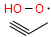

In [33]:
r1, r2 = entry.split("_")[0].split("+")
m1 = Molecule(SMILES=r1)
m2 = Molecule(SMILES=r2)
combined = Molecule.merge(m1,m2)
combined.